# Data Exploration Tutorial Activity

In this initial tutorial, you will learn or be reminded of the ways to begin characterizing your dataset. This work is where much of the science happens - understanding what your data set looks like, what data it contains, what features of it connect with others, and what modeling processes might make the most sense for your data set.

After completing this tutorial you should be able to:

* Read a data set into a pandas dataframe
* Determine the size and shape of the data set
* Determine if any data are missing from the data set
* Plot the distribution (both raw and cumulative) of different variables in the data set
* Determine how well distributions of these data fit with known distributions (e.g., Gaussian)
* Characterize the relationships between different variables in your data set (i.e., do they covary?)
* Decide on a reasonable first model for your data set

By answering a series of questions below for a constructed data set, you will achieve these goals.

## 1. Reading in data and determining basic properties of the data set

When conducting analysis using Python, the `pandas` library is incredibly useful because it provides a common framework to work with data and simple tools for characterizing that data. We will use the `pandas` library for our work throughout the summer.

There is a data set in a csv file (`regression_data.pkl`) in a folder called `data`. 

### Tasks and Questions
* Read the file into a pandas dataframe.
* What does this file contain? How many variables?
* What is the size of the data?

### Challenge:
* Determine if any data are missing from the dataset without looking at the data line-by-line.

__1. Solution__

Below we import some of the most commonly used libraries for this kind of analysis. 

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

We read the file in using the `read_pickle` method, which creates a dataframe. The data is simulated to look like education data, and emulates important qualities of this data namely covariance in the features, mixtures of scales and types as well as a non-trivial amount of noise. The variable we wish to predict is the `fci_post` column.

In [28]:
df = pd.read_pickle('data/regression_data.pkl')
df.head()

,cGPA,attendance,passed_percent,sex,hsGPA,ethnicity,fci_post
0,2.083621,51.137226,48.929495,0.0,2.061840,0.0,14.618734
1,2.043927,47.819398,31.298644,0.0,1.710748,1.0,10.652295
2,2.147087,34.160519,32.312813,1.0,2.922836,1.0,7.546426
3,2.286152,55.850494,43.496181,0.0,1.484439,2.0,14.041647
4,2.519186,77.501019,39.407797,1.0,1.694521,2.0,15.960932


By using looking at the `shape` attribute, we find that the data set has 4000 entries for each of the 7 variables.

In [3]:
df.shape

(4000, 7)

We can use `isnull()` to determine if any of the data are missing, but this method returns a boolean for each value of the data set. To pool across all the data, we will check if any of the `values` are null using `.values.any()`. It turns out that no data are missing from this data set.

In [4]:
df.isnull().values.any()

False

## 2. Plotting the distributions of your data

For this data set, there are 4000 points in each of 7 variables. While not an enormous data set, it is still too much to look at individual elements (as we saw with checking if any of the data are missing). It will be valuable for both understanding the data set and for choosing how to model it later that we see how these data are distributed.

### Tasks and Questions

* Plot the distribution (a histogram) of each variable in the data set
    * Can you do this by only using pandas methods? What other ways could you use (if needed)?
* Plot the cumuluative distribution for each variable in the data set
    * Can you do this by only using pandas methods? What other ways could you use (if needed)?
* Do the distributions of these data look familiar? What distribution(s) might they fit most closely?

__2. Solution__

Using `pandas` this task is realtively straightforward. The distribution of all the variables can be viewed by simply using the `hist` method. However, it is worth showing that you can do this for a given variable, which also can use the `hist` method. In addition the `hist` method allows us to develop a cumulative distribution that we can norm.

As we can see, most of our data looks relatively Gaussian, so we should be able to use the mean and standard deviation to build model distributions to compare them against. We will do that in the next task.

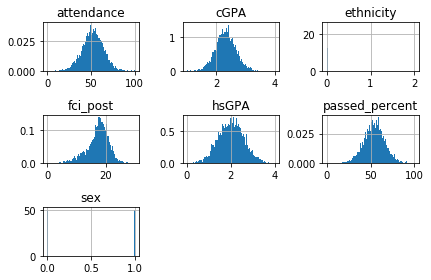

In [5]:
df.hist(bins = 100, density = 1)
plt.tight_layout()

Text(0.5, 0, 'fci_post')

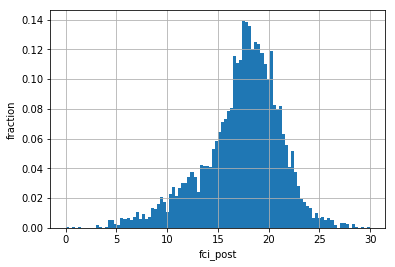

In [6]:
df['fci_post'].hist(bins = 100, density = 1)

plt.ylabel('fraction')
plt.xlabel('fci_post')

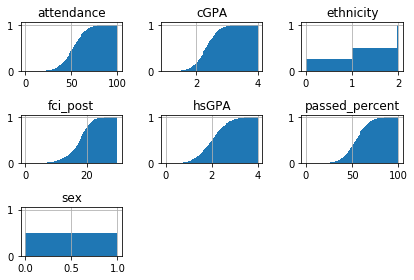

In [7]:
df.hist(cumulative=True, 
        density = 1,
        bins = 100)
plt.tight_layout()

Text(0.5, 0, 'fci_post')

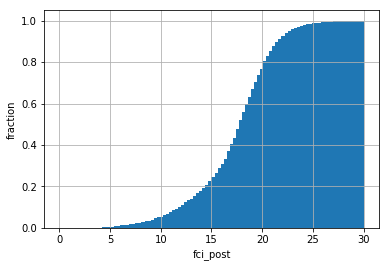

In [8]:
df['fci_post'].hist(cumulative=True, 
        density = 1,
        bins = 100)

plt.ylabel('fraction')
plt.xlabel('fci_post')

### 3. Scaling
A major part of data analysis and modelling is being aware of the impacts of the distribtions of values in the features on a given model. As an example consider a classification model with a sigmoid output, like Logistic Regression. For values above or below ~4 the logistic sigmoid function asymptotically approaches 1 or -1 respectively. A feature distributed as e.g. $x $~$\mathcal{N}(\mu=100, \sigma=2) $ will then have the same activation for all values of X, leading to the model being unable to learn anything from that feature. Scaling enables much faster learning from features originally outside the "range" of the function.

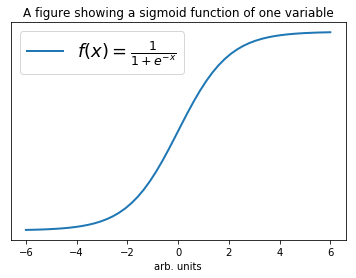

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def logistic(x): return 1/(1 + np.exp(-x))

x = np.linspace(-6, 6)
y = logistic(x)

plt.plot(x, y, label=r"$f(x) = \frac{1}{1+e^{-x}}$", linewidth=2)
plt.yticks([])
plt.xlabel("arb. units")
plt.legend(fontsize=18)
plt.title("A figure showing a sigmoid function of one variable")
plt.show()

For this task you should:
1. consider which features are suitable for scaling
2. consider the z-scaling function: $f(x) = \frac{x - \mu}{\sigma}$ where $\mu=\langle x \rangle$ and $\sigma^2= \langle x^2 \rangle - \langle x \rangle^2$. What impact does this function have on a normally distributed feature $x $~$N(\mu, \sigma^2)$? (you don't have to solve this by pen and paper - empirically showing by plotting is fine)
3. Scale suitable features with a z-scaling function. Keep a copy of the unscaled data.


1.
The non-categorical features shold be scaled, they are: 
* `cGPA`
* `attendance`
* `hsGPA`
* `passed_percent`

2. The  z-scaling function transforms any normally distributed variable to a zero mean, unit variance gaussian. We demonstrate this by scaling a distribution with $\mu = 50$, $\sigma = 5$

Text(0.5, 0, 'arb. units')

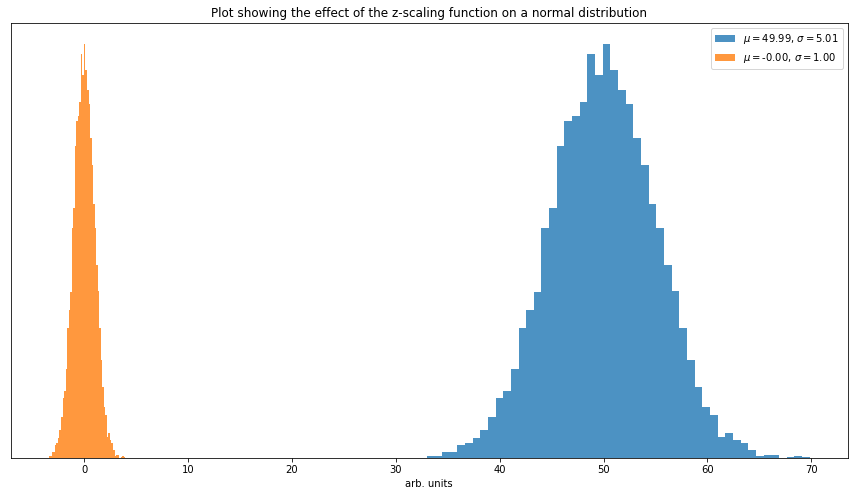

In [10]:
#normal distribution with 

fig, axs = plt.subplots(1, figsize=(15, 8))
norm = np.random.normal(50, 5, size=10000)
mu_1 = norm.mean()
sigma_1 = norm.std()

axs.hist(
    norm,
    bins=50,
    alpha=.8,
    label=r"$\mu=${:.2f}, $\sigma=${:.2f}".format(mu_1, sigma_1),
)

scaled = (norm-mu_1)/sigma_1
mu_2 = scaled.mean()
sigma_2 = scaled.std()

axs.hist(
    scaled,
    bins=50,
    alpha=.8,
    label=r"$\mu=${:.2f}, $\sigma=${:.2f}".format(mu_2, sigma_2),
)

axs.legend()
axs.set_title("Plot showing the effect of the z-scaling function on a normal distribution")
axs.set_yticks([])
axs.set_xlabel("arb. units")

In [11]:
def z_scale(x): return (x - x.mean())/x.std()

scaled_df = df.copy()
to_scale = [
    "cGPA",
    "attendance",
    "hsGPA",
    "passed_percent"
]

for c in to_scale:
    unscaled_feature = df[c].values
    scaled_feature = z_scale(unscaled_feature)
    scaled_df[c] = scaled_feature

In [12]:
scaled_df.describe()

,cGPA,attendance,passed_percent,sex,hsGPA,ethnicity,fci_post
count,4.000000e+03,4.000000e+03,4.000000e+03,4000.000000,4.000000e+03,4000.00000,4000.000000
mean,9.259538e-16,-5.006828e-16,-1.773859e-16,0.502250,-2.750404e-16,1.25000,17.347834
std,1.000125e+00,1.000125e+00,1.000125e+00,0.500057,1.000125e+00,0.82926,3.892941
min,-3.803035e+00,-4.248687e+00,-4.310020e+00,0.000000,-3.375039e+00,0.00000,0.000000
25%,-6.555104e-01,-6.352562e-01,-6.322801e-01,0.000000,-6.826774e-01,0.75000,15.384385
50%,-1.025297e-02,3.718558e-03,1.957382e-03,1.000000,1.033039e-02,1.50000,17.838868
75%,6.576694e-01,6.692449e-01,6.337006e-01,1.000000,6.793852e-01,2.00000,19.903225
max,4.772783e+00,3.877027e+00,3.644176e+00,1.000000,3.317505e+00,2.00000,30.000000


## 4. Characterizing how well your data fits known distributions

It was likely easy to see that these data for all 3 variables fit well (at least, visually) with a Gaussian distribution. Let's see if we can get a bit more quantitative with these data and see how well they fit a Gaussian distribution.

### Tasks and Questions

* Determine the mean and standard deviation for each of the variables in your data set.
* Use those values to build a Gaussian model of your data and plot that model along with your data.

### Challenge
* Look up a goodness-of-fit test for a Gaussian and determine how well the distribution of each variable fits with a Gaussian model.

__3. Solution__

We can use the `mean` and `std` methods to find these description of our data. Given that we think our data appears Gaussian, we can construct a Gaussian function with using the means and standard deviations and plot them (normalized) on top of each other.

In [13]:
means =  df.mean()
std_devs = df.std()

print("means:\n", means, "\n")
print("standard deviations:\n", std_devs)

means:
 cGPA               2.330381
attendance        52.286936
passed_percent    54.185484
sex                0.502250
hsGPA              2.017194
ethnicity          1.250000
fci_post          17.347834
dtype: float64 

standard deviations:
 cGPA               0.349865
attendance        12.308149
passed_percent    12.573553
sex                0.500057
hsGPA              0.597755
ethnicity          0.829260
fci_post           3.892941
dtype: float64


In [14]:
def compareToGaussian(variable, step = 1):
    
    mu, sigma = means[variable], std_devs[variable]
    x = np.arange(
        df[variable].min()-0.1*df[variable].min(),
        df[variable].max()+0.1*df[variable].max(),
        step
    )

    gauss = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(0.5*((x-mu)/sigma))**2)

    plt.plot(x,gauss)
    df[variable].hist(bins = 100, density = 1)
    plt.ylabel('fraction')
    plt.xlabel(variable)

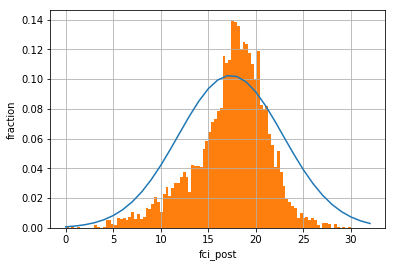

In [15]:
compareToGaussian('fci_post')

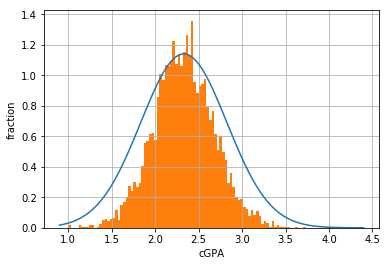

In [16]:
compareToGaussian('cGPA', 0.01)

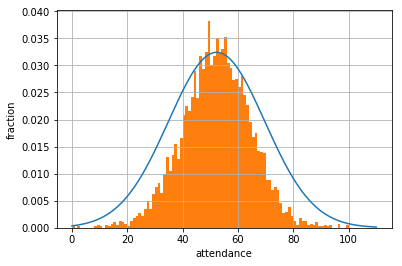

In [17]:
compareToGaussian('attendance', 0.01)

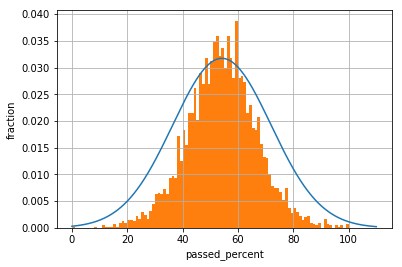

In [18]:
compareToGaussian('passed_percent', 0.01)

We can use the Shapiro-Wilk test within `scipy.stats` to check if the data were drawn from a Gaussian distribution.

In [19]:
from scipy.stats import shapiro

def normTest(data): 
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p < alpha:
        print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')

In [20]:
normTest(df['fci_post'])

Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)


In [21]:
normTest(df['cGPA'])

Statistics=0.999, p=0.001
Sample does not look Gaussian (reject H0)


In [22]:
normTest(df['attendance'])

Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)


In [23]:
normTest(df['passed_percent'])

Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)


## 5. Determining how the data are related to each other

As we are ultimately interested in building models of data, we'd like to know how the variables are related to each other. There's a few ways we can do that, which we can introduce here.

### Tasks and Questions

* Make a scatter plot of each variable against the others.
    * Do they co-vary? If the do, how so?
    * Is there a difference in the co-variance between the scaled and unscaled data?
    * Do you see "interaction effects" in your input variables?
* Quantify any covariance you see between variables.

__4. Solution__

Using the `plot.scatter()` method, we can see that there might be some sort of linerar relationship between the input variables and the output variable. It also appears there's a relationship between the input variables (i.e., possible interaction effects). We can check that using the `corr()` method.

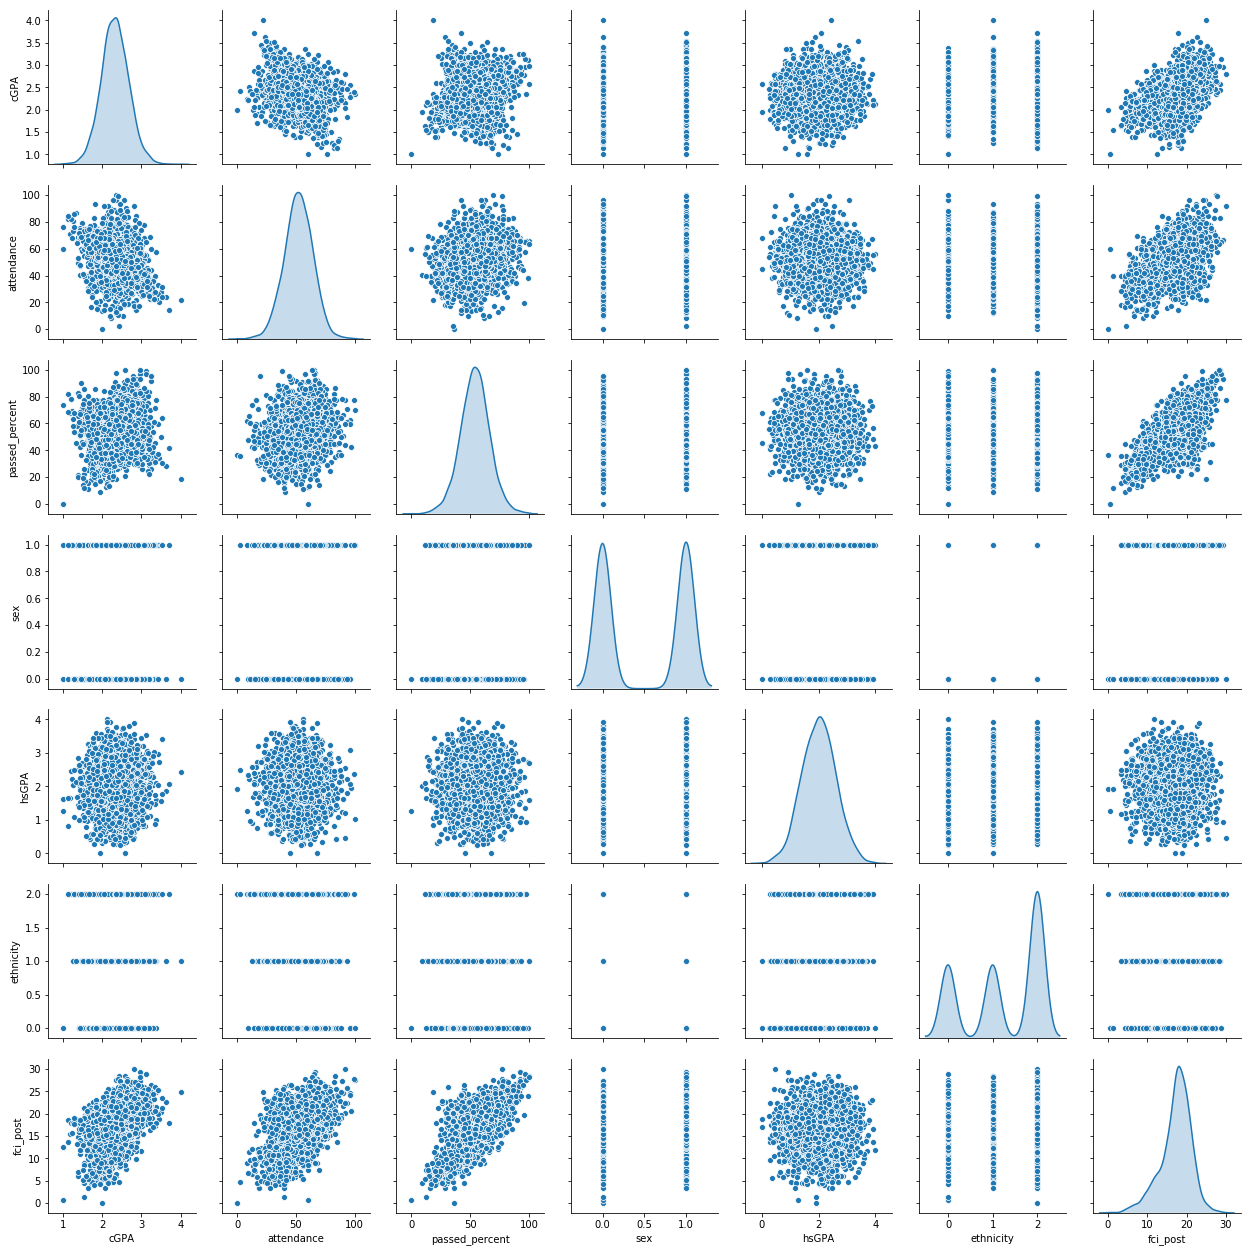

In [24]:
import seaborn as sns

sns.pairplot(df, diag_kind="kde")

In [25]:
print(df.corr())

                    cGPA  attendance  passed_percent       sex     hsGPA  \
cGPA            1.000000   -0.379050        0.098558 -0.002100  0.021969   
attendance     -0.379050    1.000000        0.198594 -0.008370 -0.023582   
passed_percent  0.098558    0.198594        1.000000  0.017745 -0.015837   
sex            -0.002100   -0.008370        0.017745  1.000000  0.010688   
hsGPA           0.021969   -0.023582       -0.015837  0.010688  1.000000   
ethnicity       0.012704    0.001537       -0.024453 -0.004975 -0.016091   
fci_post        0.429689    0.369330        0.568117 -0.011626 -0.004976   

                ethnicity  fci_post  
cGPA             0.012704  0.429689  
attendance       0.001537  0.369330  
passed_percent  -0.024453  0.568117  
sex             -0.004975 -0.011626  
hsGPA           -0.016091 -0.004976  
ethnicity        1.000000 -0.011488  
fci_post        -0.011488  1.000000  


In [26]:
print(scaled_df.corr())

                    cGPA  attendance  passed_percent       sex     hsGPA  \
cGPA            1.000000   -0.379050        0.098558 -0.002100  0.021969   
attendance     -0.379050    1.000000        0.198594 -0.008370 -0.023582   
passed_percent  0.098558    0.198594        1.000000  0.017745 -0.015837   
sex            -0.002100   -0.008370        0.017745  1.000000  0.010688   
hsGPA           0.021969   -0.023582       -0.015837  0.010688  1.000000   
ethnicity       0.012704    0.001537       -0.024453 -0.004975 -0.016091   
fci_post        0.429689    0.369330        0.568117 -0.011626 -0.004976   

                ethnicity  fci_post  
cGPA             0.012704  0.429689  
attendance       0.001537  0.369330  
passed_percent  -0.024453  0.568117  
sex             -0.004975 -0.011626  
hsGPA           -0.016091 -0.004976  
ethnicity        1.000000 -0.011488  
fci_post        -0.011488  1.000000  


Using the `.corr` method we aslo confirm that the scaling had little to no effect on the covariance matrix. 